---
title: Seaborn Distribution
tags: [jupyter]
keywords: dataVis, seaborn
summary: "Examining distributions of the data through histograms and density plots."
mlType: dataVis
infoType: seaborn
sidebar: dataVis_sidebar
permalink: __AutoGenThis__
notebookfilename:  __AutoGenThis__
---

# Imports

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# I/O

In [2]:
irisFileName = "../data/iris.csv"

In [3]:
dfIris = pd.read_csv(irisFileName,
                         index_col='Id')

In [4]:
dfIris.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# Histograms

- **a=** chooses the column we'd like to plot (in this case, we chose 'Petal Length (cm)').
- **kde=**False is something we'll always provide when creating a histogram, as leaving it out will create a slightly different plot.
    - **kde** is called [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) 
  

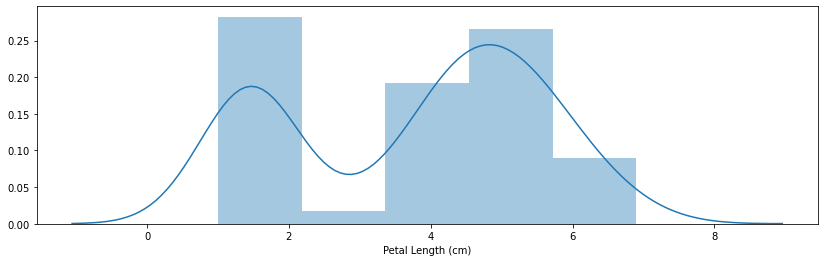

In [11]:
plt.figure(figsize=(14,4))

# note that the default is kde=True regardless 
sns.distplot(a=dfIris['Petal Length (cm)'])

plt.show()

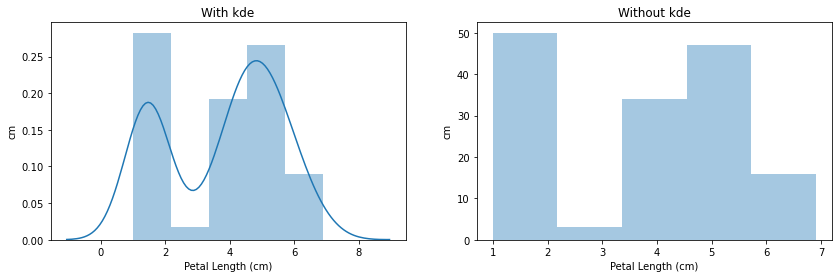

In [17]:
plt.figure(figsize=(14,4))

ax1 = plt.subplot2grid((1,2),(0,0),rowspan=1,colspan=1)

# note that the default is kde=True regardless 
sns.distplot(a=dfIris['Petal Length (cm)'])
ax1.set_ylabel('cm')
ax1.set_title('With kde')

ax2 = plt.subplot2grid((1,2),(0,1),rowspan=1,colspan=1)
# to remove it you have to make kde = false
sns.distplot(a=dfIris['Petal Length (cm)'],
            kde=False)
ax2.set_ylabel('cm')
ax2.set_title('Without kde')

plt.show()

## Kernel Density Estimate

You can think of [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation)  as smoothed out version of histogram, and if you only want that then you have to use a different graphing method called **kdeplot()**

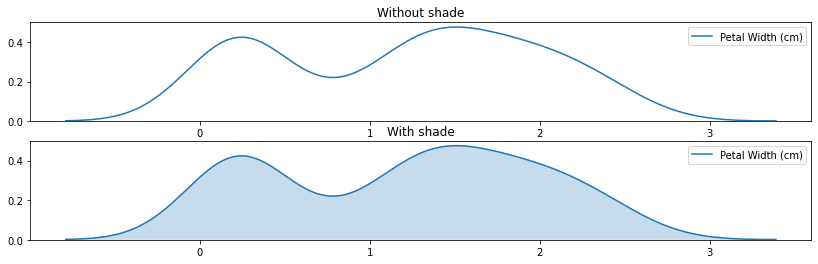

In [19]:
plt.figure(figsize=(14,4))

ax1 = plt.subplot2grid((2,2),(0,0),rowspan=1,colspan=2)
sns.kdeplot(data=dfIris['Petal Width (cm)'],shade=False)
ax1.set_title('Without shade')

ax2 = plt.subplot2grid((2,2),(1,0),rowspan=1,colspan=2)
sns.kdeplot(data=dfIris['Petal Width (cm)'],
           shade = True)
ax2.set_title('With shade')

plt.show()

# Colour Coded Distributions

In [21]:
dfIris.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
dfIris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

There are 3 species associated with the data, lets look at the distributions of each on in a single colour coded histogram distribution.  This is as simple as calling the function 3 times when graphing.  Seaborn will take care of the rest.  Make sure you  **label** the plot

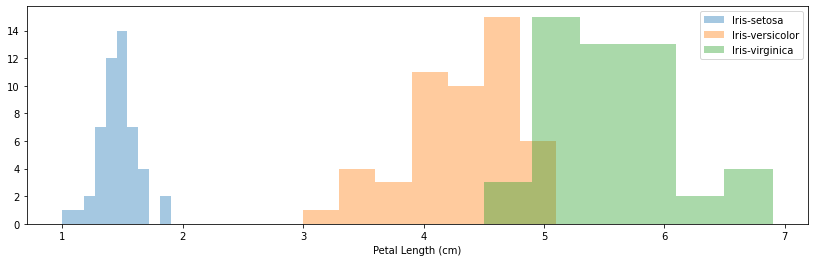

In [29]:

plt.figure(figsize=(14,4))

for plant in dfIris.Species.unique():
    sns.distplot(a=dfIris[dfIris.Species==plant]['Petal Length (cm)'],
                kde=False,
                label=plant)

plt.legend()
plt.show()

## KDE Multi-Color

Note that we can do the same thing with **KDE** plots as well, using the exact same technique.

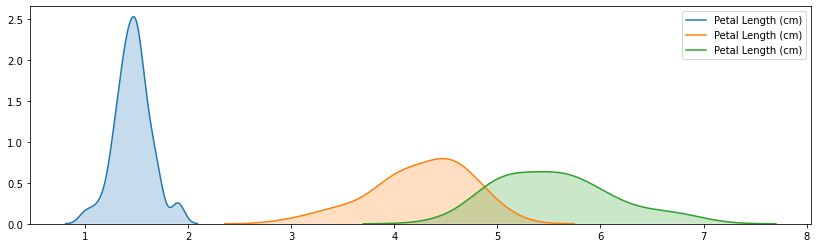

In [32]:
plt.figure(figsize=(14,4))

for plant in dfIris.Species.unique():
    sns.kdeplot(data=dfIris[dfIris.Species==plant]['Petal Length (cm)'],
               shade=True)


plt.show()

This is the classic iris distribution where one interesting pattern that can be seen in plots is that the plants seem to belong to one of two groups, where Iris versicolor and Iris virginica seem to have similar values for petal length, while Iris setosa belongs in a category all by itself.

In fact, according to this dataset, we might even be able to classify any iris plant as Iris setosa (as opposed to Iris versicolor or Iris virginica) just by looking at the petal length: if the petal length of an iris flower is less than 2 cm, it's most likely to be Iris setosa!